# Google Colab Lab Assignment -LSTM

**Course Name:** Deep Learning

**Lab Title:** Time Series Forecasting using LSTM

**Student Name:** Pranjal Lohia

**Student ID:** 202201070022

**Date of Submission:** 1 April 2025

**Group Members**:  Gayatri Mene and Divya Dhokale

# **Experiment 5.1: **
# **Objective:**
# **To forecast future values of a univariate time series using LSTM-based models.**

In [ ]:
!pip install pandas matplotlib scikit-learn
!pip install tensorflow


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0958
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0712
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0527
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0352
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0235
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0143
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0100
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0113
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0119
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0109
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0079
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0089
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0085
Epoch 14/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0081
Epoch 15/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0083
Epoch 16/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/

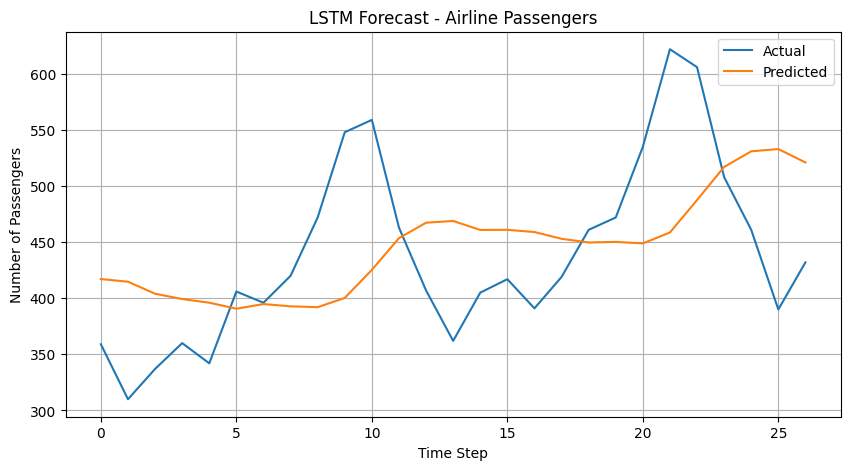

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the Airline Passengers dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, usecols=[1])
df.columns = ['Passengers']

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)

# Convert to supervised learning format
def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len])
    return np.array(X), np.array(y)

sequence_length = 10
X, y = create_sequences(data_scaled, sequence_length)

# Train-test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(sequence_length, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, verbose=1)

# Forecasting
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

# Plot prediction vs actual
plt.figure(figsize=(10, 5))
plt.plot(y_test_rescaled, label='Actual')
plt.plot(y_pred_rescaled, label='Predicted')
plt.title('LSTM Forecast - Airline Passengers')
plt.xlabel('Time Step')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid()
plt.show()


# **Experiment 5.2: Sequence Text Prediction using LSTM**
# **Objective:**
# **To generate next characters/words based on a given input sequence using LSTM.**

In [ ]:
pip install tensorflow numpy matplotlib


# **Full LSTM Pipeline Using Reddit Joke**

In [ ]:
import pandas as pd
import numpy as np
import re
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the dataset (make sure the file path is correct)
df = pd.read_csv('/content/reddit-cleanjokes.csv')

# Check the first few rows to confirm the column name
print(df.head())

# Ensure the correct column name, e.g., 'Joke' (replace 'Joke' with the actual column name if necessary)
text = "\n".join(df['Joke'].dropna().astype(str)).lower()  # Adjust 'Joke' to your correct column name if needed

# Clean the text by removing unwanted characters
text = re.sub(r"[^a-zA-Z0-9\s.,!?'\n]", '', text)

# Character to int mapping
chars = sorted(list(set(text)))  # Get all unique characters
char_to_int = {c: i for i, c in enumerate(chars)}  # Map characters to integers
int_to_char = {i: c for i, c in enumerate(chars)}  # Map integers back to characters
vocab_size = len(chars)

# Define sequence length and step
seq_length = 60
X_data, y_data = [], []

# Create input-output sequences
for i in range(0, len(text) - seq_length):
    seq_in = text[i:i + seq_length]
    seq_out = text[i + seq_length]
    X_data.append([char_to_int[char] for char in seq_in])
    y_data.append(char_to_int[seq_out])

# Convert to numpy arrays and one-hot encode labels
X = np.array(X_data)
y = to_categorical(y_data, num_classes=vocab_size)

print("Total Sequences:", len(X))
print(f"Vocabulary size: {vocab_size}")


   ID                                               Joke
0   1  What did the bartender say to the jumper cable...
1   2  Don't you hate jokes about German sausage? The...
2   3  Two artists had an art contest... It ended in ...
3   4  Why did the chicken cross the playground? To g...
4   5   What gun do you use to hunt a moose? A moosecut!
Total Sequences: 128177
Vocabulary size: 43


# **2. Prepare Sequences for LSTM**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import re  # Make sure re is imported for regex cleaning

# Ensure the correct column name, e.g., 'Joke' (replace 'Joke' with the correct column name if needed)
print(df.columns)  # Check the available columns

# Combine all jokes into one long string (assumes the column 'Joke')
text = "\n".join(df['Joke'].dropna().astype(str)).lower()

# Clean the text by removing unwanted characters
text = re.sub(r"[^a-zA-Z0-9\s.,!?'\n]", '', text)

# Character to int mapping
chars = sorted(list(set(text)))  # Get all unique characters
char_to_int = {c: i for i, c in enumerate(chars)}  # Map characters to integers
int_to_char = {i: c for i, c in enumerate(chars)}  # Map integers back to characters
vocab_size = len(chars)

# Define sequence length and step
seq_length = 60
X_data, y_data = [], []

# Create input-output sequences
for i in range(0, len(text) - seq_length):
    seq_in = text[i:i + seq_length]
    seq_out = text[i + seq_length]
    X_data.append([char_to_int[char] for char in seq_in])
    y_data.append(char_to_int[seq_out])

# Convert to numpy arrays and one-hot encode labels
X = np.array(X_data)
y = to_categorical(y_data, num_classes=vocab_size)

print("Total Sequences:", len(X))
print(f"Vocabulary size: {vocab_size}")


Index(['ID', 'Joke'], dtype='object')
Total Sequences: 128177
Vocabulary size: 43


# **Step 4: LSTM Model Definition**

In [ ]:
# Build the LSTM model
model = Sequential([
    # Embedding layer to convert integer sequences to dense vectors
    Embedding(input_dim=vocab_size, output_dim=64, input_length=seq_length),

    # LSTM layer with 256 units
    LSTM(256, return_sequences=False),  # return_sequences=False to get output only from the last timestep

    # Output layer: Dense layer with softmax activation for multi-class classification
    Dense(vocab_size, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# **Step 5: Train the Model**

In [ ]:
# Train the model
history = model.fit(X, y, epochs=10, batch_size=128)

# You can adjust the number of epochs as needed, depending on your dataset


Epoch 1/10
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 469s 465ms/step - accuracy: 0.2591 - loss: 2.6598
Epoch 2/10
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 488s 451ms/step - accuracy: 0.4207 - loss: 1.9893
Epoch 3/10
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 505s 454ms/step - accuracy: 0.4734 - loss: 1.7808
Epoch 4/10
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 499s 451ms/step - accuracy: 0.5111 - loss: 1.6490
Epoch 5/10
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 502s 452ms/step - accuracy: 0.5340 - loss: 1.5593
Epoch 6/10
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 451s 450ms/step - accuracy: 0.5622 - loss: 1.4642
Epoch 7/10
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 500s 448ms/step - accuracy: 0.5828 - loss: 1.3947
Epoch 8/10
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 555s 502ms/step - accuracy: 0.6033 - loss: 1.3219
Epoch 9/10
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 500s 499ms/step - accuracy: 0.6266 - loss: 1.2526
Epoch 10/10
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 501s 498ms/step - accuracy: 0.6372 - loss: 1.2037


# **Step 5: Plot Loss & Accuracy**

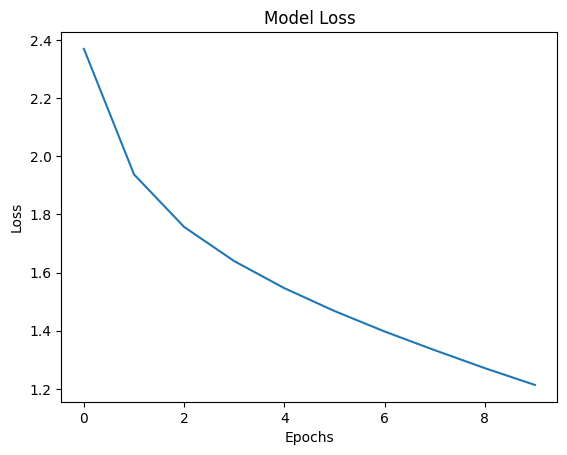

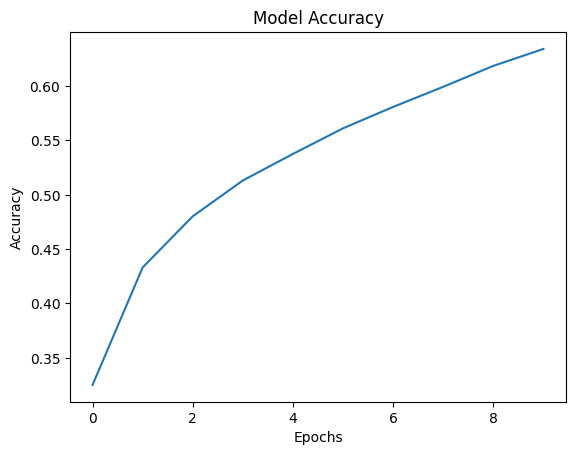

In [ ]:
# Plot training loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Plot training accuracy
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


# **Generate Text**

In [ ]:
# Function to generate text based on a seed input
def generate_text(seed_text, gen_length=300):
    pattern = [char_to_int[char] for char in seed_text]
    generated = seed_text

    # Generate 'gen_length' characters
    for _ in range(gen_length):
        x = np.reshape(pattern, (1, seq_length))  # Reshape for model input
        prediction = model.predict(x, verbose=0)
        index = np.argmax(prediction)
        result = int_to_char[index]  # Convert index to character
        generated += result
        pattern.append(index)  # Update pattern with new character
        pattern = pattern[1:]  # Maintain sequence length by removing first character

    return generated

# Choose a random starting point
start_idx = np.random.randint(0, len(text) - seq_length)
seed = text[start_idx:start_idx + seq_length]

# Display the seed text and the generated text
print("Seed Text:\n", seed)
print("\nGenerated Text:\n", generate_text(seed))


Seed Text:
 ollege? at the university.
how do you find will smith in the

Generated Text:
 ollege? at the university.
how do you find will smith in the constiped to the other day? i didn't have a piano sure to see to the other day.
what did the chicken cross the road bears of a stairs? a barder.
what did the chicken cross the road bears of a stairs? a barder.
what did the chicken cross the road bears of a stairs? a barder.
what did the chicken cro


# Experiment 5.3: Sequence Text Classification using LSTM

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


140/140 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - accuracy: 0.8677 - loss: 0.4421 - val_accuracy: 0.8655 - val_loss: 0.3982
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 19s 75ms/step - accuracy: 0.8673 - loss: 0.4008 - val_accuracy: 0.8655 - val_loss: 0.3964
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 11s 78ms/step - accuracy: 0.8570 - loss: 0.4136 - val_accuracy: 0.8655 - val_loss: 0.3962
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 19s 70ms/step - accuracy: 0.8668 - loss: 0.3982 - val_accuracy: 0.8655 - val_loss: 0.3958
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 11s 77ms/step - accuracy: 0.8652 - loss: 0.3998 - val_accuracy: 0.8655 - val_loss: 0.3994
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
              precision    recall  f1-score   support

         ham       0.87      1.00      0.93       965
        spam       0.00      0.00      0.00       150

    accuracy                           0.87      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.75      0.87      0.80      1115

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


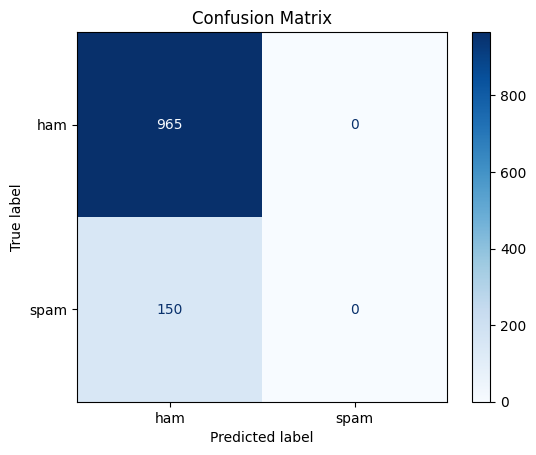

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load your dataset (replace with your actual path)
df = pd.read_csv("spam.csv", encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'text']

# Label encoding: ham=0, spam=1
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# Tokenization
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding sequences
max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# LSTM Model
model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=max_len),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training
history = model.fit(X_train_pad, y_train, epochs=5, validation_data=(X_test_pad, y_test), verbose=1)

# Evaluation
y_pred = (model.predict(X_test_pad) > 0.5).astype("int32")

# Classification report
print(classification_report(y_test, y_pred, target_names=['ham', 'spam']))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['ham', 'spam'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
